In [4]:
import os
import numpy as np
import pandas as pd
import snap as sp

# 1.  Analyzing the Wikipedia voters network
* Download the Wikipedia voting network wiki-Vote.txt.gz: http://snap.stanford.edu/data/wiki-Vote.html.
    
* Using one of the network analysis tools above, load the Wikipedia voting network. Note that Wikipedia is a directed network. Formally, we consider the Wikipedia network as a directed graph $G = (V, E)$, with node set V and edge set $E \subset V × V$ where (edges are ordered pairs of nodes). An edge $(a, b) \in E$ means that user a voted on user b.

To make our questions clearer, we will use the following small graph as a running example:
$G_{small} = (V_{small}, E_{small})$, where $V_{small} = {1, 2, 3}$ and $E_{small} = \{(1, 2),(2, 1),(1, 3),(1, 1\}$

In [53]:
# create a small graph as running example
G_small = sp.TNGraph.New()
G_small.AddNode(1)
G_small.AddNode(2)
G_small.AddNode(3)
G_small.AddEdge(1, 2)
G_small.AddEdge(2, 1)
G_small.AddEdge(1, 3)
G_small.AddEdge(1, 1)

-1

In [6]:
fname_vikivote = os.path.join(r'../Dataset', 'Wiki-Vote.txt')
G_wikivote = sp.LoadEdgeList(sp.PNGraph, fname_vikivote, 0, 1)

In [46]:
dir(G_wikivote)

['AddEdge',
 'AddEdge2',
 'AddEdgeUnchecked',
 'AddNode',
 'AddNodeUnchecked',
 'BegEI',
 'BegNI',
 'Clr',
 'Defrag',
 'DelEdge',
 'DelNode',
 'Dump',
 'Edges',
 'Empty',
 'EndEI',
 'EndNI',
 'GetEI',
 'GetEdges',
 'GetMxNId',
 'GetNI',
 'GetNIdV',
 'GetNodes',
 'GetRefs',
 'GetRndNI',
 'GetRndNId',
 'GetSmallGraph',
 'HasFlag',
 'IsEdge',
 'IsNode',
 'IsOk',
 'Load',
 'LoadShM',
 'New',
 'Nodes',
 'Reserve',
 'ReserveNIdInDeg',
 'ReserveNIdOutDeg',
 'Save',
 'SortNodeAdjV',
 '__call__',
 '__class__',
 '__delattr__',
 '__deref__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__ref__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__swig_destroy__',
 '__weakref__',
 'this',
 'thisown']

### 1.1. The number of nodes in the network. ($G_{small}$ has 3 nodes.)

In [57]:
def num_nodes(G):
    """
    1.1. The number of nodes in the network.
    Input: Graph G
    """
    return G.GetNodes()

In [77]:
# 1.1
print(num_nodes(G_small))
print('The number of nodes in the network = {}'.format(num_nodes(G_wikivote)))

3
The number of nodes in the network = 7115


### 1.2. The number of nodes with a self-edge (self-loop), i.e., the number of nodes $a \in V$ where $(a, a) \in E$. ($G_{small}$ has 1 self-edge.) 

In [84]:
def num_nodes_selfloop(G):
    """
    1.2. The number of nodes with a self-edge (self-loop)
    """
    num = 0
    for E in G.Edges():
        if E.GetSrcNId() == E.GetDstNId():
            num += 1
    return num
            

In [85]:
# 1.2
print(num_nodes_selfloop(G_small))
print('The number of nodes with a self-edge (self-loop) = {}' .format(num_nodes_selfloop(G_wikivote)))

1
The number of nodes with a self-edge (self-loop) = 0


### 1.3. The number of directed edges in the network, i.e., the number of ordered pairs $(a, b) \in E$ for which $a \neq b$. ($G_{small}$ has 3 directed edges.)  

In [66]:
def num_dir_edges(G):
    """
    1.3. The number of directed edges in the network
    """
    num = 0
    for E in G.Edges():
        if E.GetSrcNId() != E.GetDstNId():
            num += 1
    return num

In [81]:
# 1.3
print(num_dir_edges(G_small))
print('The number of directed edges in the network = {}' .format(num_dir_edges(G_wikivote)))

3
The number of directed edges in the network = 103689


### 1.4. The number of undirected edges in the network, i.e., the number of unique unordered pairs $(a, b), a \neq b$, for which $(a, b) \in E$ or $(b, a) \in E$ (or both). If both $(a, b)$ and $(b, a)$ are edges, this counts a single undirected edge. ($G_{small}$ has 2 undirected edges.) 

In [94]:
def num_undir_edges(G):
    """
    1.4. The number of undirected edges in the network
    """
    num_one_way = 0
    num_two_way = 0
    for E in G.Edges():
        if E.GetSrcNId() != E.GetDstNId():
            if G.IsEdge(E.GetDstNId(), E.GetSrcNId()):
                num_two_way += 1
            else:
                num_one_way += 1
            
    return num_one_way + int(num_two_way/2)

In [95]:
# 1.4
print(num_undir_edges(G_small))
print('The number of undirected edges in the network = {}' .format(num_undir_edges(G_wikivote)))

2
The number of undirected edges in the network = 100762


### 1.5. The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes $(a, b), a \neq b$, for which $(a, b) \in E$ and $(b, a) \in E$. ($G_{small}$ has 1 reciprocated edge.) 

In [96]:
def num_rec_edges(G):
    """
    1.5. The number of reciprocated edges in the network
    """
    num_two_way = 0
    for E in G.Edges():
        if E.GetSrcNId() != E.GetDstNId():
            if G.IsEdge(E.GetDstNId(), E.GetSrcNId()):
                num_two_way += 1
            
    return int(num_two_way/2)

In [97]:
# 1.5
print(num_rec_edges(G_small))
print('The number of reciprocated edges in the network = {}' .format(num_rec_edges(G_wikivote)))

1
The number of reciprocated edges in the network = 2927


### 1.6. The number of nodes of zero out-degree. ($G_{small}$ has 1 node with zero out-degree.)  

In [103]:
def num_zero_outdeg_nodes(G):
    """
    1.6. The number of nodes of zero out-degree
    """
    num = 0
    for N in G.Nodes():
        if N.GetOutDeg() == 0:
            num += 1
    return num

In [104]:
# 1.6
print(num_zero_outdeg_nodes(G_small))
print('The number of nodes of zero out-degree = {}' .format(num_zero_outdeg_nodes(G_wikivote)))

1
The number of nodes of zero out-degree = 1005


### 1.7. The number of nodes of zero in-degree. ($G_{small}$ has 0 nodes with zero in-degree.)  

In [105]:
def num_zero_indeg_nodes(G):
    """
    1.7. The number of nodes of zero in-degree
    """
    num = 0
    for N in G.Nodes():
        if N.GetInDeg() == 0:
            num += 1
    return num

In [106]:
# 1.7
print(num_zero_indeg_nodes(G_small))
print('The number of nodes of zero out-degree = {}' .format(num_zero_indeg_nodes(G_wikivote)))

0
The number of nodes of zero out-degree = 4734


### 1.8. The number of nodes with more than 10 outgoing edges ($out-degree > 10$).  

In [109]:
def num_outdegmore10_nodes(G):
    """
    1.8. The number of nodes with more than 10 outgoing edges
    """
    num = 0
    for N in G.Nodes():
        if N.GetOutDeg() > 10:
            num += 1
    return num


In [110]:
print(num_outdegmore10_nodes(G_small))
print('The number of nodes with more than 10 outgoing edges = {}' .format(num_outdegmore10_nodes(G_wikivote)))

0
The number of nodes with more than 10 outgoing edges = 1612


### 1.9. The number of nodes with fewer than 10 incoming edges ($in-degree < 10$).   

In [111]:
def num_indegless10_nodes(G):
    """
    1.9. The number of nodes with fewer than 10 incoming edges
    """
    num = 0
    for N in G.Nodes():
        if N.GetInDeg() < 10:
            num += 1
    return num

In [112]:
print(num_indegless10_nodes(G_small))
print('The number of nodes with fewer than 10 incoming edges = {}' .format(num_indegless10_nodes(G_wikivote)))

3
The number of nodes with fewer than 10 incoming edges = 5165


# 2. Further Analyzing the Wikipedia voters network
For this problem, we use the Wikipedia voters network. If you are using Python, you might want to use $NumPy$, $SciPy$, and/or $Matplotlib$ libraries.
*  Plot the distribution of out-degrees of nodes in the network on a log-log scale. Each data point is a pair $(x, y)$ where $x$ is a positive integer and $y$ is the number of nodes in the network with out-degree equal to $x$. Restrict the range of $x$ between the minimum and maximum out-degrees. You may filter out data points with a $0$ entry. For the log-log scale, use base $10$ for both $x$ and $y$ axes.    
<br>
* Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot. Note we want to find coefficients a and b such that the function $\log_{10}y = a \cdot \log_{10}x + b$, equivalently, $y = 10^b\cdot x^a$ , best fits the out-degree distribution. What are the coefficients $a$ and $b$? For this part, you might want to use the method called $polyfit$ in NumPy with deg parameter equal to $1$

In [336]:
Deg_wikivote = sp.TIntPrV()
sp.GetOutDegCnt(G_wikivote, Deg_wikivote)
y_num_nodes = []
x_degrees = []
for i in Deg_wikivote:
    if i.GetVal1() != 0:
        x_degrees.append(i.GetVal1())
        y_num_nodes.append(i.GetVal2())
x_degrees = np.array(x_degrees, dtype=np.float)
y_num_nodes = np.array(y_num_nodes , dtype=np.float)

max_deg = np.amax(x_degrees)
min_deg = np.amin(x_degrees)
print('max out-degree of wiki vote network is {}' .format(int(max_deg)))
print('min out-degree of wiki vote network is {}' .format(int(min_deg)))

max out-degree of wiki vote network is 893
min out-degree of wiki vote network is 1


In [207]:
import matplotlib.pyplot as plt
%matplotlib inline 

The least-square regression line is:
  
-1.281 x + 3.132


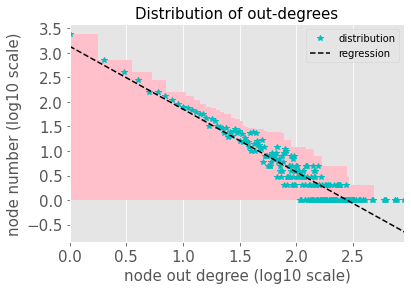

a = -1.2810647056745657
b = 3.1324547044999136


In [344]:
z = np.polyfit(np.log10(x_degrees), np.log10(y_num_nodes), 1)
para = np.poly1d(z)
print('The least-square regression line is:\n {}'.format(para))
xp = np.linspace(np.log10(min_deg), np.log10(max_deg), num=x_degrees.shape[0])

fig = plt.figure()
plt.bar(x=np.log10(x_degrees), height=np.log10(y_num_nodes), width=0.5, color='pink')
plt.plot(np.log10(x_degrees), np.log10(y_num_nodes), '*', color='c', label='distribution')
plt.plot(xp, para(xp), '--', color='k', label='regression')
plt.grid(axis='y')
plt.xlim(np.log10(min_deg), np.log10(max_deg))
plt.xlabel('node out degree (log10 scale)',fontsize=15)
plt.ylabel('node number (log10 scale)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribution of out-degrees',fontsize=15)
plt.legend()
plt.show()

print('a = {}\nb = {}'.format(z[0], z[1]))

# 3. Finding Experts on the Java Programming Language on StackOverflow
Download the StackOverflow network stackoverflow-Java.txt.gz: http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz. An edge $(a, b)$ in the network means that person a endorsed an answer from person b on a Java-related question.  
<br>
Using one of the network analysis tools above, load the StackOverflow network. Note that StackOverflow is a directed network. Compute and print out the following statistics for the stackoverflow-Java network:

In [292]:
fname_stack = os.path.join(r'../Dataset', 'stackoverflow-Java.txt')
G_stack = sp.LoadEdgeList(sp.PNGraph, fname_stack, 0, 1)

### 1. The number of weakly connected components in the network. This value can be calculated in $Snap.py$ via function $GetWccs$.

In [302]:
wccs_stack = sp.TCnComV()
sp.GetWccs(G_stack, wccs_stack)
print('The number of weakly connected components is: {}' .format(wccs_stack.Len()))

The number of weakly connected components is: 10143


### 2. The number of edges and the number of nodes in the largest weakly connected component. The largest weakly connected component is calculated in $Snap.py$ with function $GetMxWcc$.

In [297]:
MxWcc = sp.GetMxWcc(G_stack)
print('The number of edges is {} and the number of nodes is {} in the largest weakly connected component'
      .format(MxWcc.GetEdges(), MxWcc.GetNodes()))

The number of edges is 322486 and the number of nodes is 131188 in the largest weakly connected component


### 3. IDs of the top $3$ most central nodes in the network by $PagePank$ scores. $PageRank$ scores are calculated in $Snap.py$ with function $GetPageRank$.

In [284]:
PRankH = sp.TIntFltH()
sp.GetPageRank(G_stack, PRankH)
Page_IDs = []
Page_scores = []
for item in PRankH:
    Page_IDs.append(item)
    Page_scores.append(PRankH[item])
N = 3
maxrank_ind = sorted(range(len(Page_scores)), key = lambda sub: Page_scores[sub])[-N:] 
print('IDs of the top 3 most central nodes are: {}, {}, {}'
      .format(Page_IDs[maxrank_ind[0]], Page_IDs[maxrank_ind[1]], Page_IDs[maxrank_ind[2]] ))

IDs of the top 3 most central nodes are: 22656, 135152, 992484


### 4. IDs of the top $3$ hubs and top $3$ authorities in the network by HITS scores. HITS scores are calculated in $Snap.py$ with function $GetHits$.

In [287]:
NIdHubH = sp.TIntFltH()
NIdAuthH = sp.TIntFltH()
sp.GetHits(G_stack, NIdHubH, NIdAuthH)
Hub_IDs = []
Auth_IDs = []
Hub_scores = []
Auth_scores = []
for item in NIdHubH:
    Hub_IDs.append(item)
    Hub_scores.append(NIdHubH[item])
for item in NIdAuthH:
    Auth_IDs.append(item)
    Auth_scores.append(NIdAuthH[item])
N = 3
maxHub_ind = sorted(range(len(Hub_scores)), key = lambda sub: Hub_scores[sub])[-N:] 
maxAuth_ind = sorted(range(len(Auth_scores)), key = lambda sub: Auth_scores[sub])[-N:] 
print('IDs of the top 3 hubs are: {}, {}, {}'
      .format(Hub_IDs[maxHub_ind[0]], Hub_IDs[maxHub_ind[1]], Hub_IDs[maxHub_ind[2]] ))   
print('IDs of the top 3 authorities are: {}, {}, {}'
      .format(Auth_IDs[maxAuth_ind[0]], Auth_IDs[maxAuth_ind[1]], Auth_IDs[maxAuth_ind[2]] )) 

IDs of the top 3 hubs are: 359862, 1194415, 892029
IDs of the top 3 authorities are: 571407, 157882, 22656
